## Monte Carlo simulation of stable membrane curvatures

##### Using functions from mem_curve.py

In [1]:
# Standard imports
import matplotlib.pyplot as plt
import pandas as pd

# Custom imports
from mem_curve import *

### Running simulation, replica exchange, annealing

#### Simulation:
##### Initialise model membrane, run Monte Carlo for <n> steps

#### Replica exchange:
##### Access surfaces otherwise separated by potential barriers...
##### Tune kbT factor up & down to alter acceptance ratio from equilibrium ensemble
##### Run parallel simulation windows, can swap replicas between kbT environments

#### Annealing:
##### Slowly return kbT factor to equilibrium
##### If too quick, will form "glass" -- initially all moves "downhill" & become trapped in metastable state space

In [2]:
# Choose number of Monte Carlo steps
nsteps = 10000

# Initialise membrane ensemble
membrane_lst = [init_model_membrane()]

In [3]:
# Track acceptance probability
naccepts = 0

# Run simulation
for step in range(nsteps):
    
    membrane_lst, accept_move = montecarlostep(membrane_lst)
    
    naccepts += 1 if accept_move else 0

print('Acceptance ratio:', naccepts/nsteps)
    
#cut_index = 10
#membrane_lst, energy_lst = membrane_lst[cut_index:], energy_lst[cut_index:]

Acceptance ratio: 0.7901


In [4]:
# Save data to a csv

df = pd.DataFrame(membrane_lst)

# Save to CSV with index
df.to_csv("model_membranes.csv", index=True)

### Data Analysis

#### Plot bending energy vs Monte Carlo step
#### Plot mean curvature vs Monte Carlo step
#### Plot Gaussian curvature vs Monte Carlo step
##### ^ are these values expected? Are states stable &/ in equilibrium ensemble?

In [5]:
# Extract bending energy from membrane_lst of dictionaries
energy_lst = [ membrane['energy'] for membrane in membrane_lst ]

# Calculate values every <nframes>
nframes = 10

H_lst = []
K_lst = []

for membrane in membrane_lst[::nframes]:

    # Calculate shape operator
    S = calc_shape_operator(membrane, params.X, params.Y)
    # Calculate mean and Gaussian curvatures
    H_lst += [np.sum(calc_H(S))]
    K_lst += [np.sum(calc_K_G(S))]

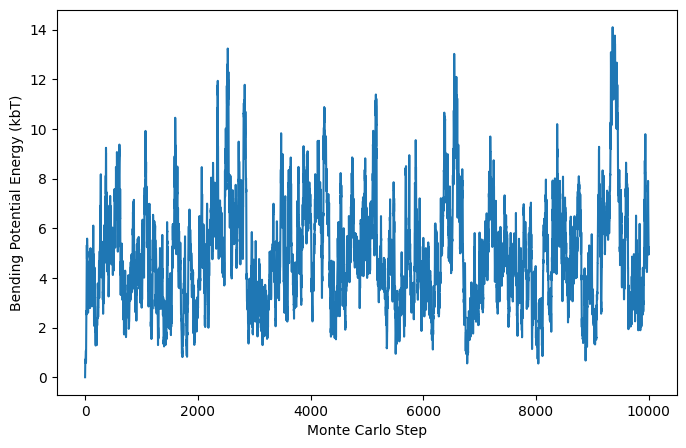

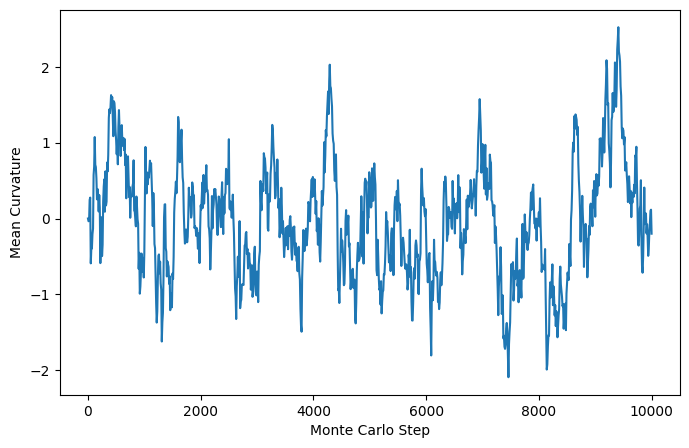

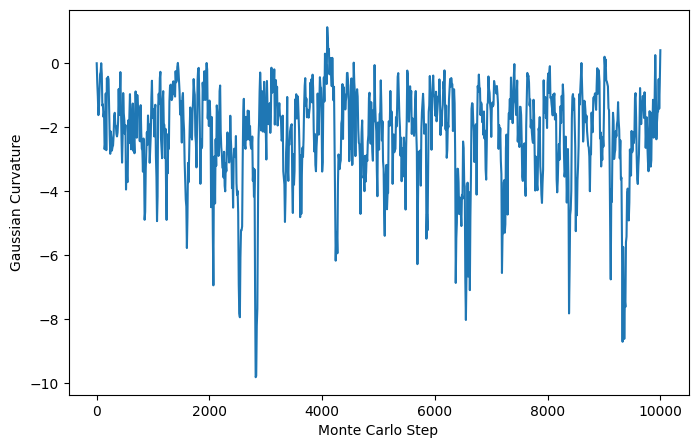

In [6]:
# Plot energy
plt.figure(figsize=[8,5])
plt.ylabel('Bending Potential Energy (kbT)')
plt.xlabel('Monte Carlo Step')
plt.plot(range(0,nsteps+1), energy_lst)
plt.show()

# Plot mean curvature
plt.figure(figsize=[8,5])
plt.ylabel('Mean Curvature')
plt.xlabel('Monte Carlo Step')
plt.plot(range(0,nsteps+1,nframes), H_lst)
plt.show()

# Plot Gaussian curvature
plt.figure(figsize=[8,5])
plt.ylabel('Gaussian Curvature')
plt.xlabel('Monte Carlo Step')
plt.plot(range(0,nsteps+1,nframes), K_lst)
plt.show()

#### Take mean of height (from equilibrium sampled region)
##### Is average membrane structure flat?

#### Take mean squared height
##### How does membrane thickness compare to CWT..?

$\langle h(\textbf{r})^{2} \rangle = \frac{k_bT}{16\pi \kappa} L^{2} $

In [7]:
# Calculate values every <nframes>
nframes = 1

# Simulated values
mean_height   = 0 #np.zeros( (len(params.X), len(params.Y)) )
meansq_height = 0 #np.zeros( (len(params.X), len(params.Y)) )

for membrane in membrane_lst[::nframes]:

    # Calculate height
    mem_height     = calc_height(membrane, params.X, params.Y)
    mean_height   += np.sum(mem_height)
    meansq_height += np.sum(mem_height**2)
    
mean_height   /= len(membrane_lst[::nframes])
meansq_height /= len(membrane_lst[::nframes])

# Theoretical value (from Capillary Wave Theory on membranes)
cwt_meansq_h = params.kbT / (16 * np.pi * params.kappa_H) * params.l_x * params.l_y

In [9]:
print(f'''
<h> = {mean_height} (simulated)
<h> = 0.0 (CWT)

<h^2> = {meansq_height} (simulated) 
<h^2> = {cwt_meansq_h} (CWT)''')


<h> = 2.8942621113096063 (simulated)
<h> = 0.0 (CWT)

<h^2> = 4.588360057527571 (simulated) 
<h^2> = 1.989436788648692 (CWT)


#### Visualising membrane curvature

In [10]:
# Set plots as pop-ups
%matplotlib qt

In [11]:
# Visualise membrane curvatures with contour plot movie
visualise(membrane_lst, nframes=50)